# Task 3 -  To Explore Decision Tree Algorithm

In [2]:
#importing libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read data using pandas dataframe
my_data= pd.read_csv("Iris (1).csv")
my_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
my_data.shape

(150, 6)

In [8]:
my_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Data visualisation

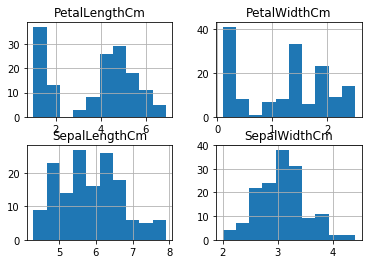

In [10]:
viz = my_data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
viz.hist()
plt.show()

In [11]:
my_data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

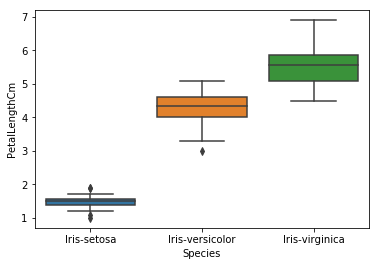

In [12]:
sns.boxplot(x="Species", y="PetalLengthCm", data=my_data)
plt.show()

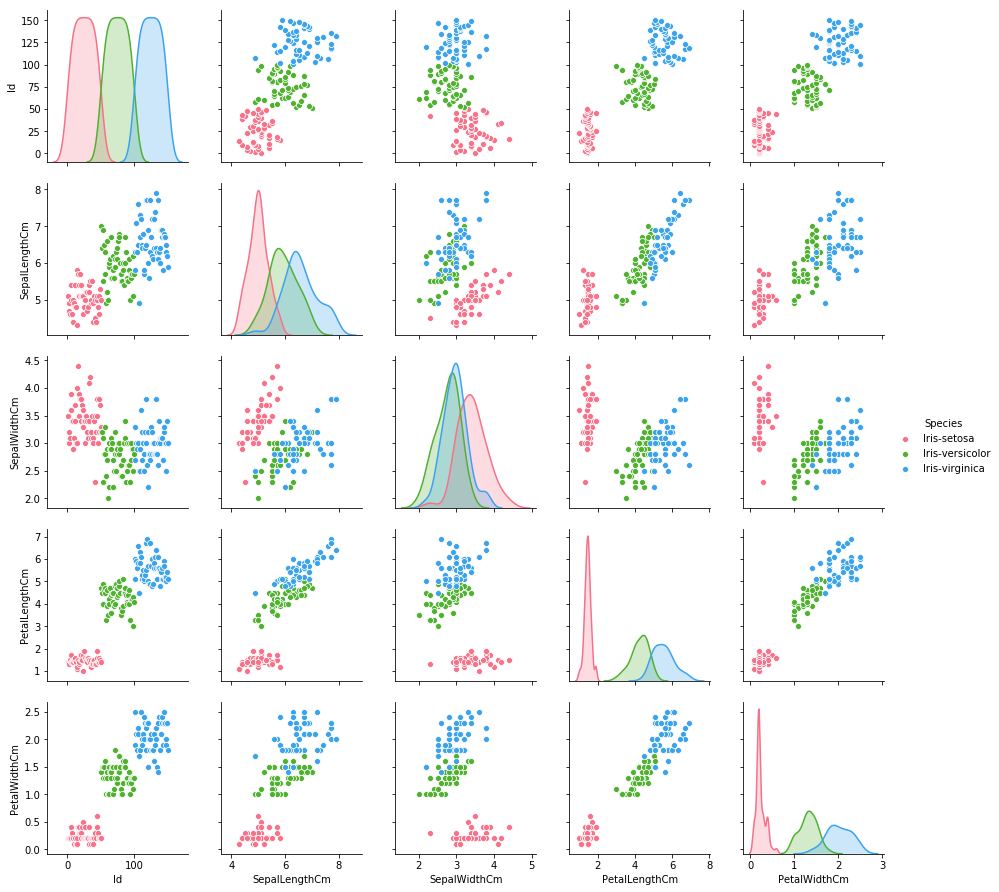

In [13]:

g = sns.pairplot(my_data, hue="Species", palette="husl")

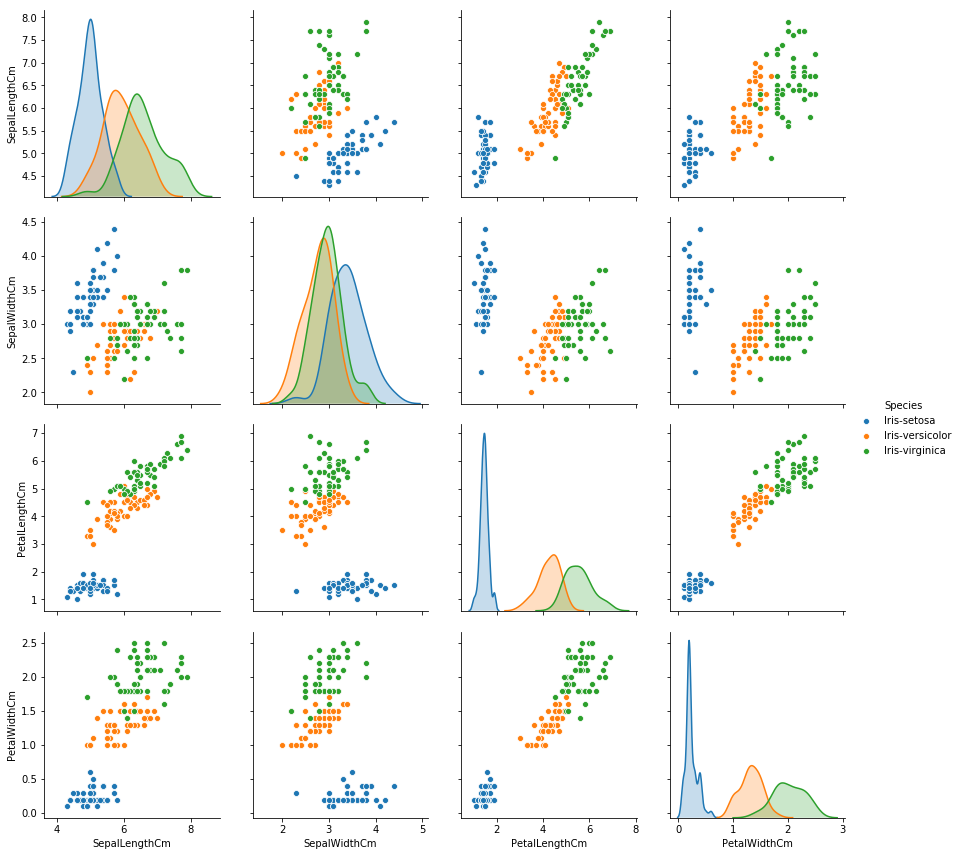

In [14]:
sns.pairplot(my_data.drop("Id", axis=1), hue="Species", height=3, diag_kind="auto")
plt.show()

# Preprocessing

In [15]:
X = my_data.iloc[:, 1:5].values
Y = my_data.iloc[:, 5].values

In [16]:
#SETTING UP DECISION TREE

In [17]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size = 0.25, random_state =0)

Modeling
We will first create an instance of the DecisionTreeClassifier called irisTree 

In [19]:
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
irisTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction and Evaluation

In [21]:
predTree = irisTree.predict(X_testset)
print (predTree [0:5])
print (Y_testset [0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9736842105263158


# Visualisation

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree_img= plot_tree(irisTree, feature_names=my_data.columns, class_names=my_data['Species'].unique().tolist(), precision=4,label="all",filled=True)
plt.show()

ImportError: cannot import name 'plot_tree' from 'sklearn.tree' (C:\Users\megha\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)